In [120]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_transmission(n_layers, d_layers, wavelengths):
    # Constants
    n0 = 1.0  # Refractive index of the incident medium (air)
    ns = 1.0  # Refractive index of the substrate


    # Calculate the transmission for each wavelength
    transmission = []
    reflection_power = []
    for wavelength in wavelengths:
        # Initialize the characteristic matrix for the entire stack
        M_total = np.array([[1, 0], [0, 1]], dtype=complex)

        # Calculate the characteristic matrix for each layer and multiply them
        for n_index, d in zip(n_layers, d_layers):

            match n_layers:
                case 0:
                      n_index = 1
                case 1:
                      n_index = 1.463 + 0.003827/(wavelength**2) + 0.000/(wavelength**4)
                        
                case 2:
                      n_index = 2.1305 + 0.018499/(wavelength**2) + 0.00199850/(wavelength**4)

                case 99:
                      n_index = 99

            delta = 2 * np.pi * n_index * d / wavelength
            M = np.array([[np.cos(delta), 1j * np.sin(delta) / n_index],
                          [1j * n_index * np.sin(delta), np.cos(delta)]])
            M_total = np.dot(M_total, M)

        # Calculate the Power transmission coefficient T
        t = 2 * n0 / (M_total[0, 0] * n0 + M_total[0, 1] * n0*ns + M_total[1, 0] * n0 + M_total[1, 1] * ns)
        T = np.abs(t)**2
        
        transmission.append(T)

        # Calculate the Power Reflection coefficient R_power

        m11 = M_total[0,0]
        m12 = M_total[0,1]
        m21 = M_total[1,0]
        m22 = M_total[1,1]

        B = m11 + m12*ns
        C = m21 + m22 * ns
        r = (n0*B - C) / (n0 * B + C)
        R_power = r * np.conj(r)

        reflection_power.append(R_power)

    return transmission,reflection_power 



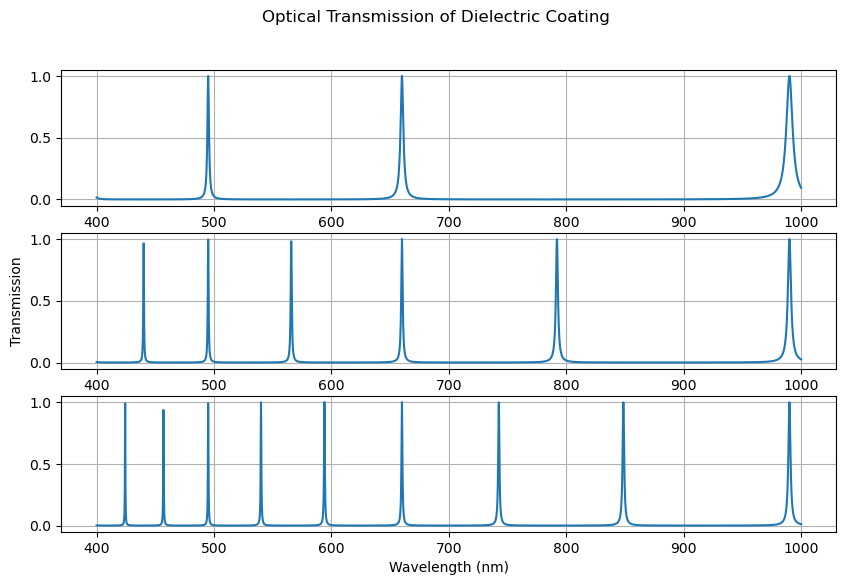

In [121]:
# Fabry perot Interferometer

# Wavelength range (in nm)
wavelengths = np.linspace(400, 1000, 4000)

n_layers = [99,99]

d_layers = [5,5]
d_layers_2 = [10,10]
d_layers_3 = [15,15]

# Calculate transmission
transmission, reflection_power = calculate_transmission(n_layers, d_layers, wavelengths)
transmission_2, reflection_power_2 = calculate_transmission(n_layers, d_layers_2, wavelengths)
transmission_3, reflection_power_3 = calculate_transmission(n_layers, d_layers_3, wavelengths)

fig1, (ax11,ax12,ax13) = plt.subplots(3,1, figsize = (10,6), sharey=False)
fig1.suptitle("Optical Transmission of Dielectric Coating")

# Plot the results
ax11.plot(wavelengths, transmission)
ax11.grid(True)

ax12.plot(wavelengths, transmission_2)
ax12.set_ylabel('Transmission')
ax12.grid(True)

ax13.plot(wavelengths, transmission_3)
ax13.set_xlabel('Wavelength (nm)')
ax13.grid(True)
#plt.show()

Text(0.5, 0, 'Wavelength (nm)')

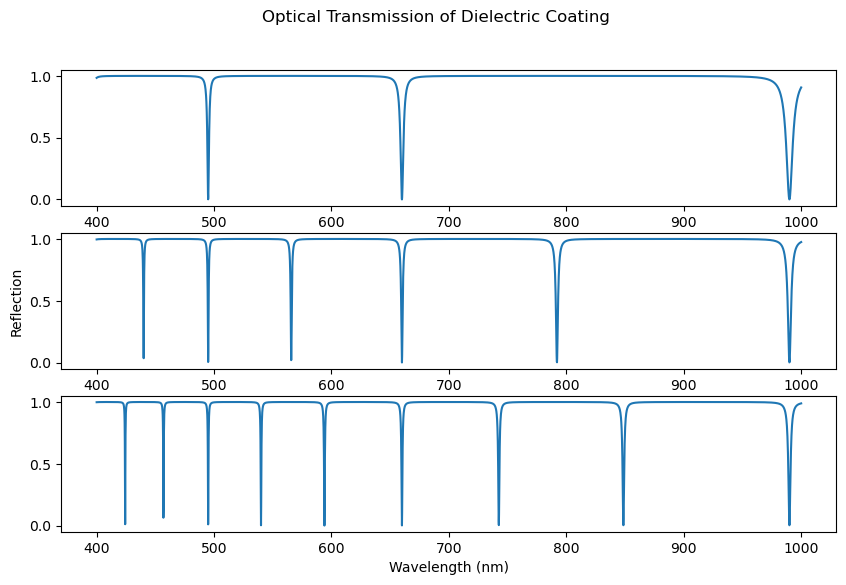

In [122]:
# Reflection
fig2, (ax21,ax22,ax23) = plt.subplots(3,1, figsize = (10,6), sharey=False)
fig2.suptitle("Optical Transmission of Dielectric Coating")

ax21.plot(wavelengths, reflection_power)
ax22.plot(wavelengths, reflection_power_2)
ax22.set_ylabel('Reflection')
ax23.plot(wavelengths, reflection_power_3)
ax23.set_xlabel('Wavelength (nm)')
#plt.xlabel('Wavelength (nm)')
#plt.ylabel('Reflection')
#plt.title('Optical Reflection of Dielectric Coating')
#plt.grid(True)
# Wavelength range (in nm)
#plt.show()

Text(0.5, 0, 'Wavelength (nm)')

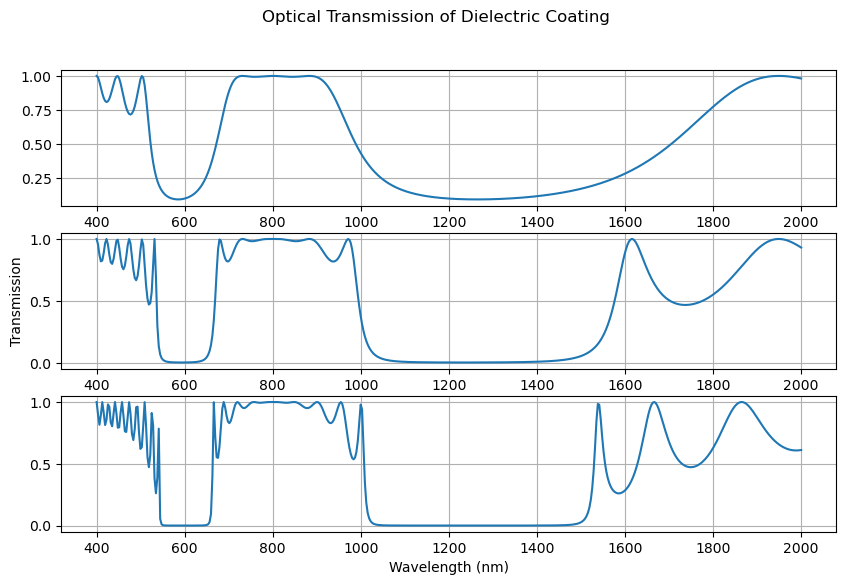

In [123]:
wavelengths = np.linspace(400, 2000, 500)


n_layers = [1,2,1,2,1,2]
d_layers = [200,200,200,200,200,200]

# Calculate transmission
transmission, reflection_power = calculate_transmission(n_layers, d_layers, wavelengths)

n_layers_2 = [1,2,1,2,1,2,1,2,1,2,1,2]
d_layers_2 = [200,200,200,200,200,200,200,200,200,200,200,200]

# Calculate transmission
transmission_2, reflection_power_2 = calculate_transmission(n_layers_2, d_layers_2, wavelengths)

n_layers_3 = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2]
d_layers_3 = [200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200]
transmission_3, reflection_power_3 = calculate_transmission(n_layers_3, d_layers_3, wavelengths)


fig1, (ax11,ax12,ax13) = plt.subplots(3,1, figsize = (10,6), sharey=False)
fig1.suptitle("Optical Transmission of Dielectric Coating")

# Plot the results
ax11.plot(wavelengths, transmission)
ax11.grid(True)

ax12.plot(wavelengths, transmission_2)
ax12.grid(True)
ax12.set_ylabel('Transmission')

ax13.plot(wavelengths, transmission_3)
ax13.grid(True)
ax13.set_xlabel('Wavelength (nm)')
# Plot the results
#plt.plot(wavelengths, transmission)
#plt.xlabel('Wavelength (nm)')
#plt.ylabel('Transmission')
#plt.title('Optical Transmission of Dielectric Coating')
#plt.grid(True)
#plt.show()


Text(0.5, 0, 'Wavelength (nm)')

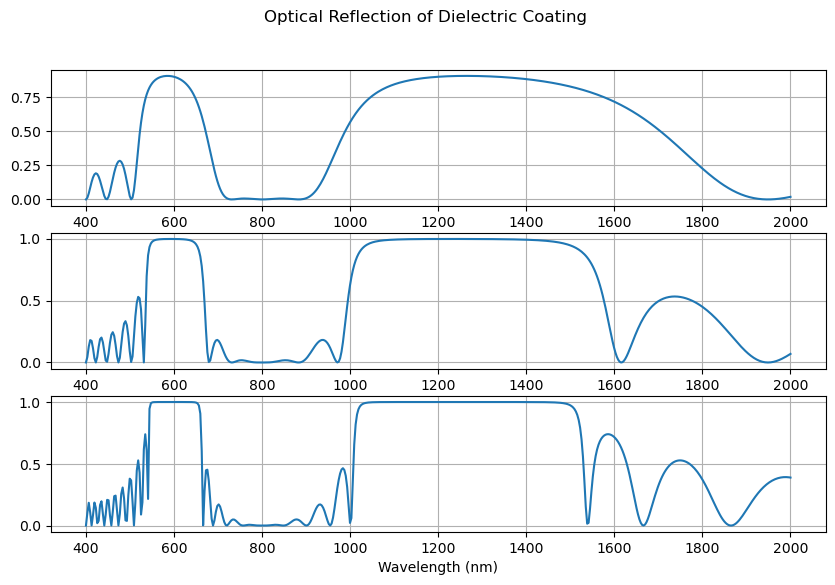

In [124]:
# Reflection

fig2, (ax21,ax22,ax23) = plt.subplots(3,1, figsize = (10,6), sharey=False)
fig2.suptitle("Optical Reflection of Dielectric Coating")

ax21.plot(wavelengths, reflection_power)
ax21.grid(True)

ax22.plot(wavelengths, reflection_power_2)
ax22.grid(True)

ax23.plot(wavelengths, reflection_power_3)
ax23.grid(True)

ax23.set_xlabel('Wavelength (nm)')

